Implementing a Neural Network from Scratch

I am now connecting my git repo

In [15]:
!git clone https://github.com/niyeldeii/Neural-Network-from-scratch.git
!git pull



fatal: destination path 'Neural-Network-from-scratch' already exists and is not an empty directory.
Already up to date.


First we start with, implementing a Neuron in NumPy with a Sigmoid Activation Function
Parameters:


*   	Weights (w): [0,4]
*  Bias (b): 2.5

*  Input (x): [6,7]






In [8]:
import numpy as np
def sigmoid(x):
  #formula for sigmoid is (1)/(1+(e^-(x))
  return 1/(1+np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights=np.array([0,4])
bias=2.5
n=Neuron(weights,bias)
x=np.array([6,7])
print(n.feedforward(x))



0.9999999999999432


Now let's build a neural network with:
  - 4 inputs
  - a hidden layer with 2 neurons (h1, h2,)
  - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [4, 9]
    - b = 1

In [9]:
class TheNeuralNetwork:
  def __init__(self, weights, bias):
    self.weights=weights
    self.bias=bias
    self.h1=Neuron(weights,bias)
    self.h2=Neuron(weights,bias)
    self.h3=Neuron(weights,bias)
    self.h4=Neuron(weights,bias)
    self.o1=Neuron(weights,bias)
  def feedforward(self, x):
    out_h1=self.h1.feedforward(x)
    out_h2=self.h2.feedforward(x)
    out_o1=self.o1.feedforward(np.array([out_h1, out_h2,]))
    hidden_outputs = np.array([out_h1, out_h2])
    out_o1 = self.o1.feedforward(hidden_outputs)
    return out_o1

nn=TheNeuralNetwork(weights,bias)
x= np.array([2,3])
print(nn.feedforward(x))

0.9984988147193368


Now let's train our Neural Network to Predict car type given the age and annual income in thousands
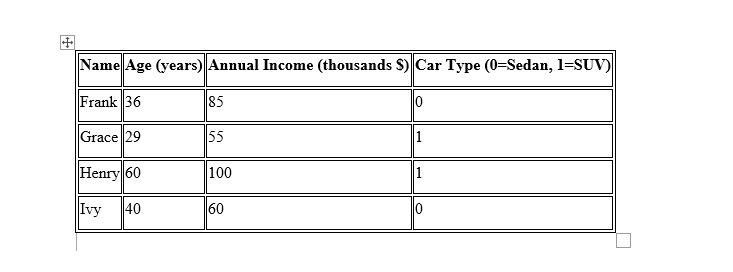

In [10]:
#first we normalize data by subtractking the mean from age and annual income
import numpy as np

# Define the dataset
ages = np.array([36, 29, 60, 40])
annual_incomes = np.array([85, 55, 100, 60])

# Calculate the mean for each column
mean_age = np.mean(ages)
mean_income = np.mean(annual_incomes)

# Normalize the data by subtracting the mean
normalized_ages = ages - mean_age
normalized_incomes = annual_incomes - mean_income

# Output the normalized values
normalized_ages, normalized_incomes


(array([ -5.25, -12.25,  18.75,  -1.25]), array([ 10., -20.,  25., -15.]))

building a neural network to do the prediction using the normalized data

In [11]:
def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mse_loss(y_true, y_pred): #defining the loss function using mean squared error
    return ((y_true - y_pred) ** 2).mean() #y_true is the true value while y_pred is the predicted value

class NeuralNetwork:
  def __init__(self):
    self.w1